In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# !pip install git+https://www.github.com/keras-team/keras-contrib.git
# !pip install git+https://www.github.com/keras-team/keras-contrib.git
import nibabel as nib
from skimage import transform
from numpy import array
# from keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import os
import pickle
import keras
from functools import partial
from sklearn.model_selection import train_test_split
 
import pandas as pd

import numpy as np
from keras import backend as K
 
import tensorflow as tf
 


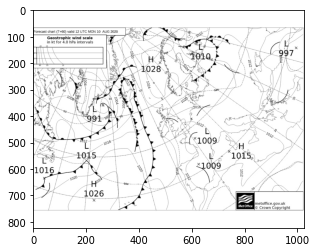

In [ ]:
pth='/content/2.jpeg'
import cv2

img = cv2.imread(pth)
plt.imshow(img[:,:])

# **Gaussain Filter**

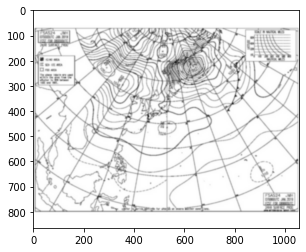

In [ ]:
from scipy.ndimage import gaussian_filter
result = gaussian_filter(img, sigma=2)
plt.imshow(result)

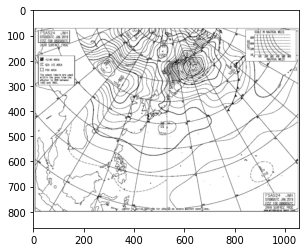

In [ ]:
import cv2
kernel = np.ones((5,5),np.float32)/25
blur = cv2.GaussianBlur(img,(3,3),2)
plt.imshow(blur)

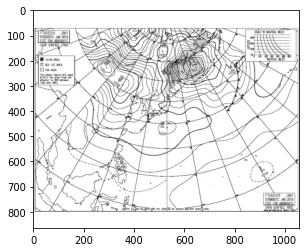

In [ ]:
gau = cv2.GaussianBlur(img,(3,3),0)
plt.imshow(gau)

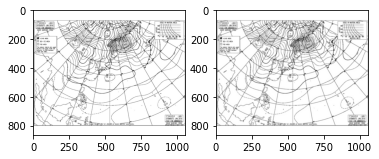

In [ ]:
from scipy import misc
import matplotlib.pyplot as plt
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = gaussian_filter(img, sigma=1)
ax1.imshow(img)
ax2.imshow(result)
plt.show()

# **Median Filtering**

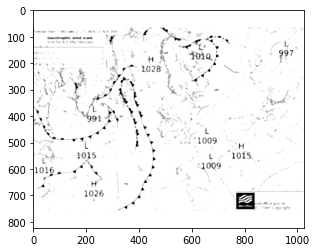

In [ ]:
from scipy.ndimage import gaussian_filter
median = cv2.medianBlur(img,5)
plt.imshow(median)

# **Average Filtering**

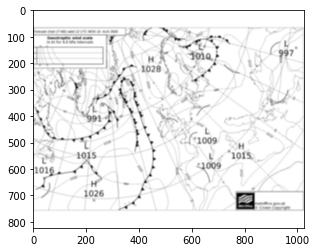

In [ ]:
average= cv2.blur(img,(7,7))
plt.imshow(average)

# **Sharpening**

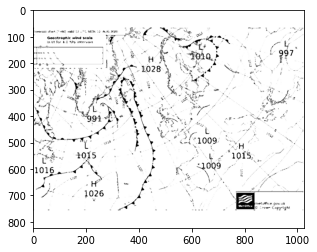

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(img, -1, kernel)
plt.imshow(im)

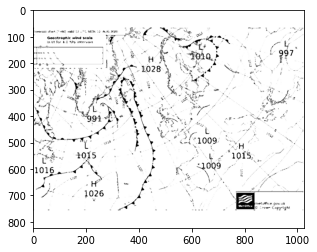

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(img, -1, kernel)
plt.imshow(im)

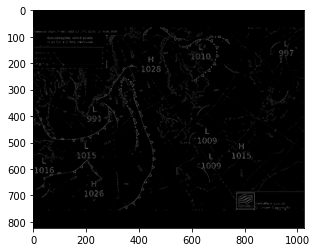

In [ ]:
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

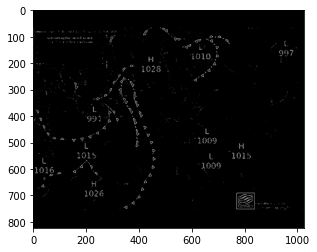

In [ ]:
kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

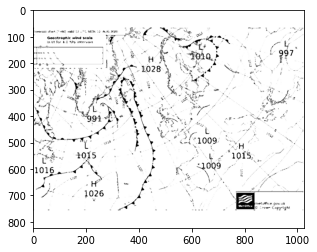

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

# **Laplacian on Gaussian**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


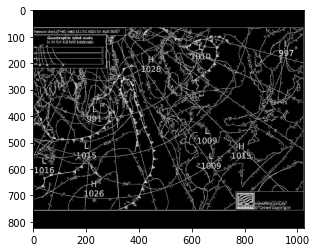

In [ ]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.imshow(laplacian)

# **Laplacian on Median**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


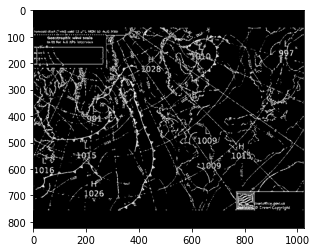

In [ ]:
laplacian = cv2.Laplacian(median,cv2.CV_64F)
plt.imshow(laplacian)

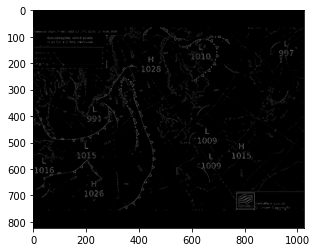

In [ ]:
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

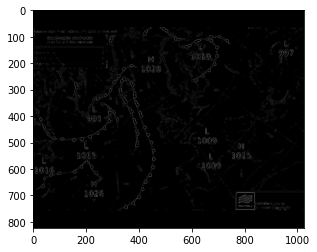

In [ ]:
kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

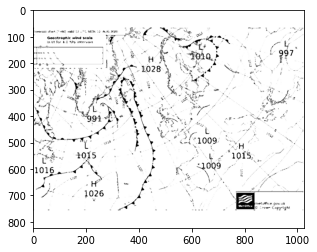

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

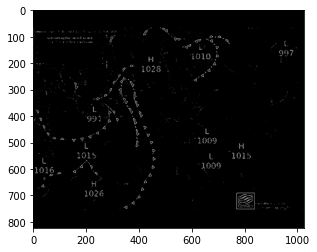

In [ ]:
kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

# **Laplacian on Average**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


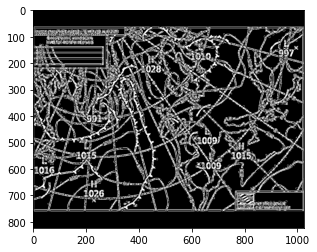

In [ ]:
laplacian = cv2.Laplacian(average,cv2.CV_64F)
plt.imshow(laplacian)


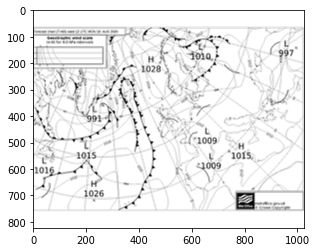

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

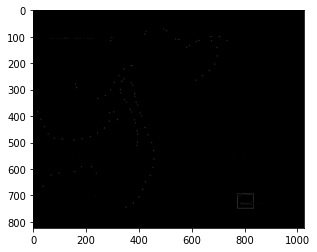

In [ ]:
kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

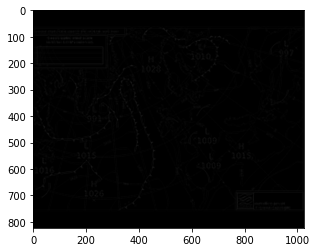

In [ ]:
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

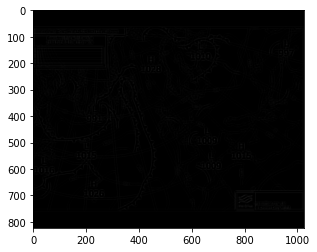

In [ ]:
kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

# **Sobel on Gaussian**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


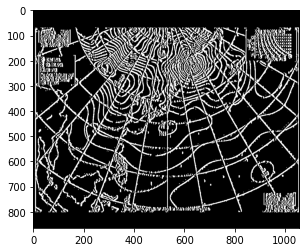

In [ ]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)  # x
plt.imshow(sobelx)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


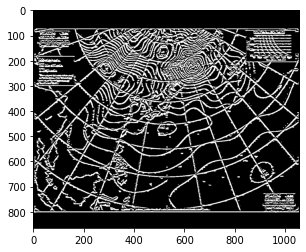

In [ ]:
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)  # y
plt.imshow(sobely)

# **Sobel on Average**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


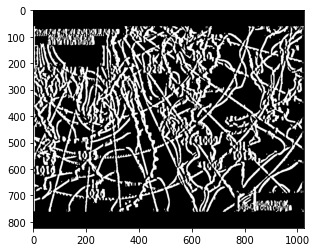

In [ ]:
sobelx = cv2.Sobel(average,cv2.CV_64F,1,0,ksize=5)  # x
plt.imshow(sobelx)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


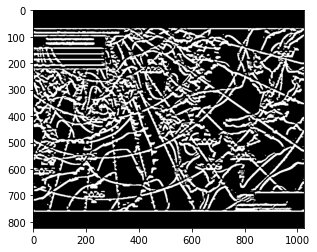

In [ ]:
sobely = cv2.Sobel(average,cv2.CV_64F,0,1,ksize=5)  # y
plt.imshow(sobely)

# **Sobel on Median**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


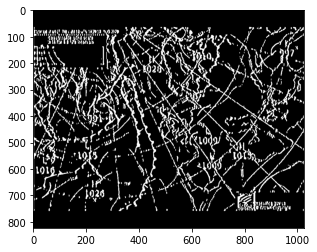

In [ ]:
sobelx = cv2.Sobel(median,cv2.CV_64F,1,0,ksize=5)  # x
plt.imshow(sobelx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


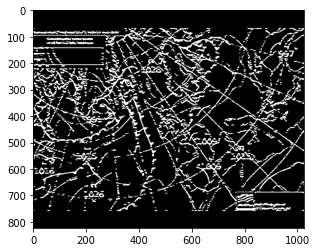

In [ ]:
sobely = cv2.Sobel(median,cv2.CV_64F,0,1,ksize=5)  # y
plt.imshow(sobely)

In [ ]:
# import scipy,skimage
# from skimage import color, data, restoration
# psf = np.ones((5,5)) / 25
# img6 = scipy.signal.convolve2d(img,psf,'same')
# img6 += 0.1 * img6.std() * np.random.standard_normal(img6.shape)
# Wiener_filtered = restoration.wiener(img6,psf,1100) 
# plt.imshow(Wiener_filtered)


# **Unsharp Filter**

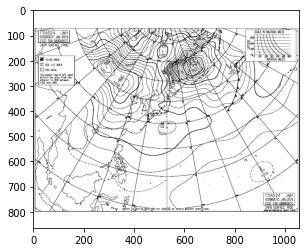

In [ ]:
from PIL import Image, ImageFilter
image = Image.fromarray(img.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
plt.imshow(new_image)


# **JANNAT**

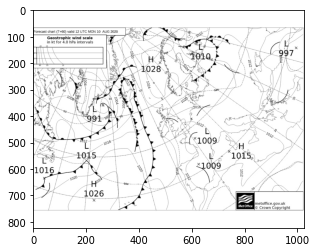

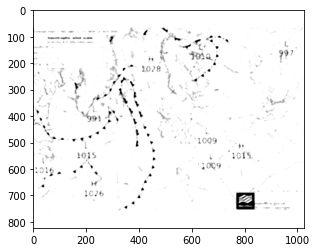

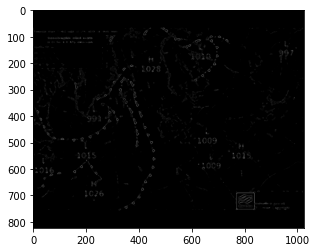

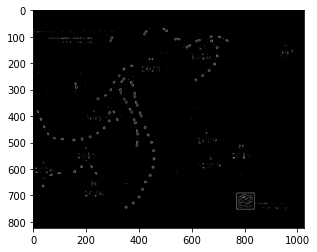

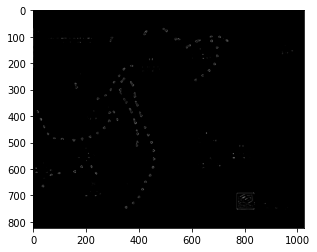

In [ ]:
from scipy.ndimage import gaussian_filter
import cv2
pth='/content/2.jpeg'
img = cv2.imread(pth)
plt.imshow(img)
plt.show()

median = cv2.medianBlur(img,3)
plt.imshow(median)
plt.show()

kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
im1 = cv2.filter2D(median, -1, kernel)
plt.imshow(im1)
plt.show()

kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
im2 = cv2.filter2D(median, -1, kernel)
plt.imshow(im2)
plt.show()

im3 = cv2.medianBlur(im2,3)
plt.imshow(im3)
plt.show()



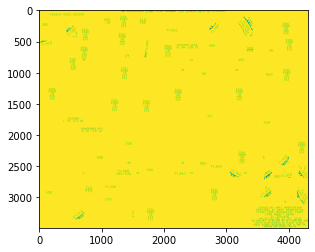

In [ ]:
from PIL import Image
image = Image.open("/content/Image4.jpg")
plt.imshow(image)

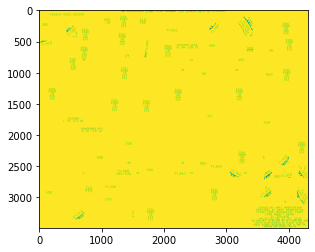

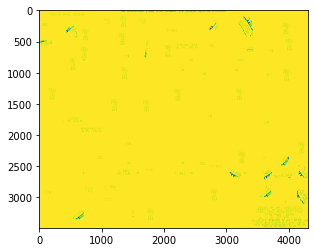

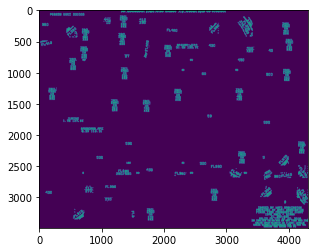

In [ ]:
from scipy.ndimage import gaussian_filter
import cv2
import matplotlib.pyplot as plt

pth='/content/Image4.jpg'
img = cv2.imread(pth,0)
# img=img.get_data()
plt.imshow(img)
plt.show()
ret, thresh1 = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()
i=img-thresh1
plt.imshow(i)
plt.show()


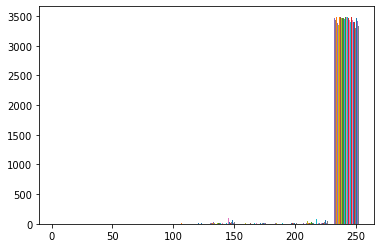

In [ ]:
plt.hist(img, bins = 10)
plt.show()

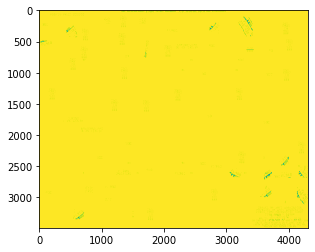

In [ ]:

pth='/content/Image4.jpg'
img = cv2.imread(pth,0)
h,w=img.shape
for i in range(h):
  for j in range(w): 
    if img[i][j]>138:
      img[i][j]=255
    
plt.imshow(img)
plt.show()
